## Imports Libs

In [242]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, ReLU
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Prepare data

In [243]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Set Models

### 2.a Perceptron with Logistic Activation, SSE Cost, Gradient Descent

In [244]:
model_2a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
model_2a.compile(optimizer=SGD(), loss=MeanSquaredError(), metrics=['accuracy'])

model_2a_over_epochs = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
model_2a_over_epochs.compile(optimizer=SGD(), loss=MeanSquaredError(), metrics=['accuracy'])

/home/nikomania/Documents/Github/NOIA-Trabalho-1/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 2.b Softmax Output and Cross-Entropy Loss

In [245]:
model_2b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2b.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.c Adam Optimizer

In [246]:
model_2c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2c.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.d ReLU Activation

In [247]:
model_2d = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2d.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2e) Larger Networks

##### Single Hidden Layer with 256 Neurons

In [248]:
model_2e_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_1.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

##### Two Hidden Layers with 256 Neurons

In [249]:
model_2e_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_2.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [250]:
def plot_history(history, model_id, epochs_10=False):
    plt.title(f'Model {model_id}')
    plt.plot(history.history['accuracy'][:10] if epochs_10 else history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'][:10] if epochs_10 else history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.title(f'Model {model_id}')
    plt.plot(history.history['loss'][:10] if epochs_10 else history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'][:10] if epochs_10 else history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Training

#### Model 2a

In [251]:
history_2a = model_2a.fit(x_train, to_categorical(y_train), validation_data=(x_test, to_categorical(y_test)), epochs=10, batch_size=64)
history_2a_over_epochs = model_2a_over_epochs.fit(x_train, to_categorical(y_train), validation_data=(x_test, to_categorical(y_test)), epochs=60, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1257 - loss: 0.1725 - val_accuracy: 0.1663 - val_loss: 0.0917
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1922 - loss: 0.0907 - val_accuracy: 0.2867 - val_loss: 0.0892
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2874 - loss: 0.0890 - val_accuracy: 0.3262 - val_loss: 0.0884
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3240 - loss: 0.0883 - val_accuracy: 0.3442 - val_loss: 0.0878
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3478 - loss: 0.0877 - val_accuracy: 0.3616 - val_loss: 0.0873
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3618 - loss: 0.0871 - val_accuracy: 0.3844 - val_loss: 0.0867
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3867 - loss: 0.0866 - val_accuracy: 0.4006 - val_loss: 0.0861
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4052 - loss: 0.0859 - val_accuracy: 0.

#### Model 2a analysis


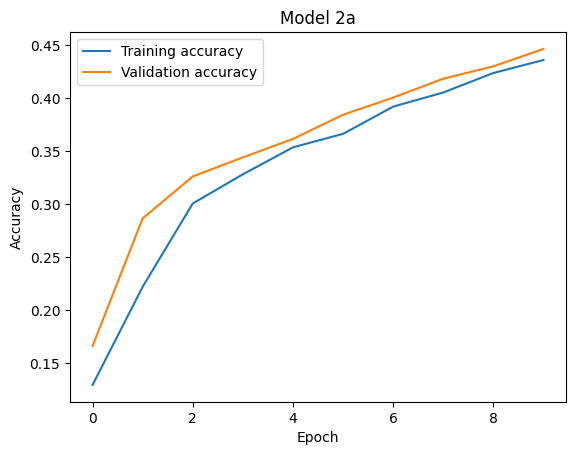

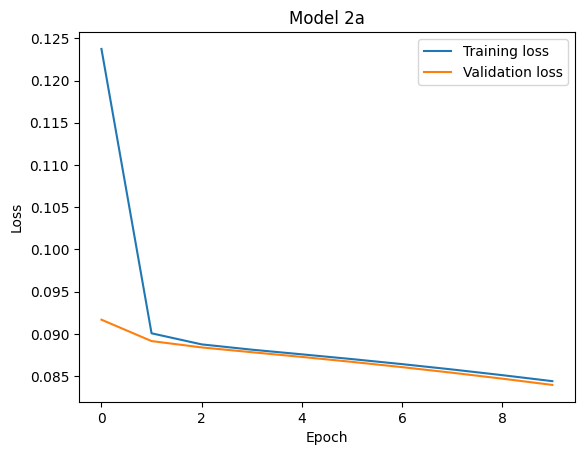

In [252]:
plot_history(history_2a, '2a')

According to the plot, the model still didn't converge yet. While the training accuracy is increasing and the training loss is decreasing, the validation is following a similar pattern. Moreover, in order to test if the model would converge, it was raised the number of epochs from 10 to 60 to allow the model to converge.

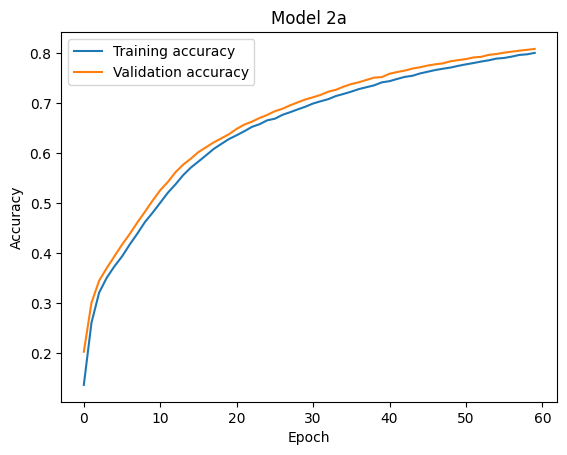

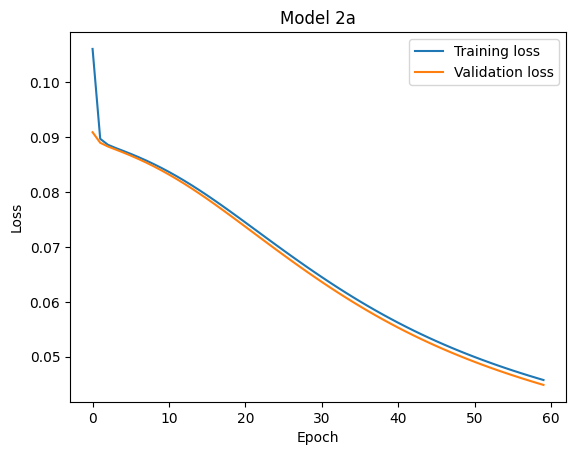

In [253]:
plot_history(history_2a_over_epochs, '2a')

After checking the model trained over 60 epochs, it can be concluded that maybe an increase in the learning rate would help it converge more rapidly. Furthermore, the model still doesn't look like it converged yet (training and validation are really similar and it still doesn't look like it's stuck). Maybe testing on another dataset would determine if this logic holds true.

#### Model 2b

In [254]:
history_2b = model_2b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4796 - loss: 2.0325 - val_accuracy: 0.7847 - val_loss: 1.3144
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7863 - loss: 1.1836 - val_accuracy: 0.8317 - val_loss: 0.8472
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8326 - loss: 0.8116 - val_accuracy: 0.8593 - val_loss: 0.6552
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8553 - loss: 0.6475 - val_accuracy: 0.8725 - val_loss: 0.5557
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8683 - loss: 0.5535 - val_accuracy: 0.8813 - val_loss: 0.4962
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8760 - loss: 0.5042 - val_accuracy: 0.8851 - val_loss: 0.4553
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8816 - loss: 0.4628 - val_accuracy: 0.8906 - val_loss: 0.4263
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8846 - loss: 0.4433 - val_accuracy: 0.

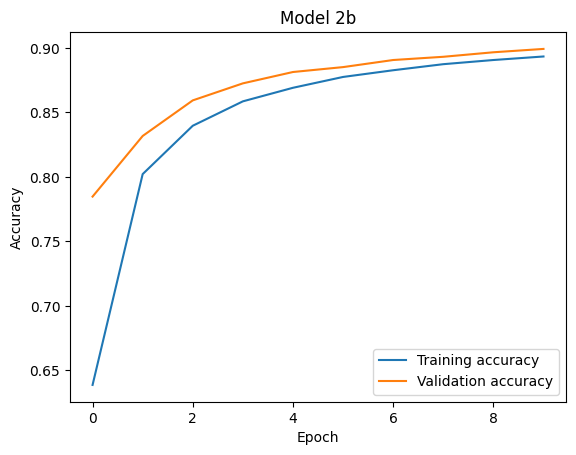

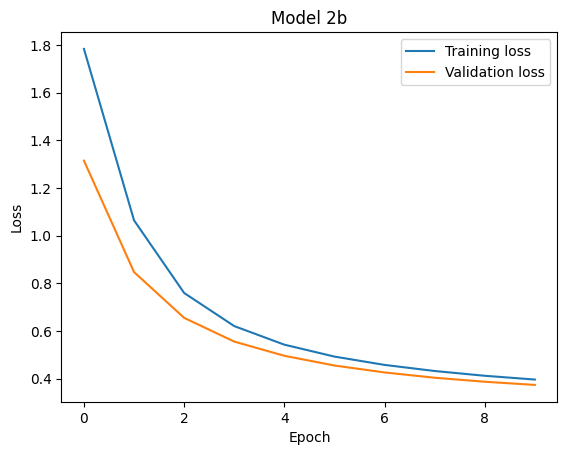

In [255]:
plot_history(history_2b, '2b')

According to the plot, the model perhaps has finished converging. While the training accuracy is increasing and the training loss is decreasing, the validation is following a similar pattern (and the slope of the tangent line at the end seems to approach zero).

#### Model 2c

In [256]:
history_2c = model_2c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8037 - loss: 0.7921 - val_accuracy: 0.9265 - val_loss: 0.2588
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9298 - loss: 0.2455 - val_accuracy: 0.9421 - val_loss: 0.2000
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9452 - loss: 0.1884 - val_accuracy: 0.9530 - val_loss: 0.1588
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9588 - loss: 0.1470 - val_accuracy: 0.9577 - val_loss: 0.1395
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9655 - loss: 0.1205 - val_accuracy: 0.9642 - val_loss: 0.1201
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9714 - loss: 0.1028 - val_accuracy: 0.9666 - val_loss: 0.1105
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9774 - loss: 0.0828 - val_accuracy: 0.9698 - val_loss: 0.0992
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9796 - loss: 0.0737 - val_accuracy: 0.

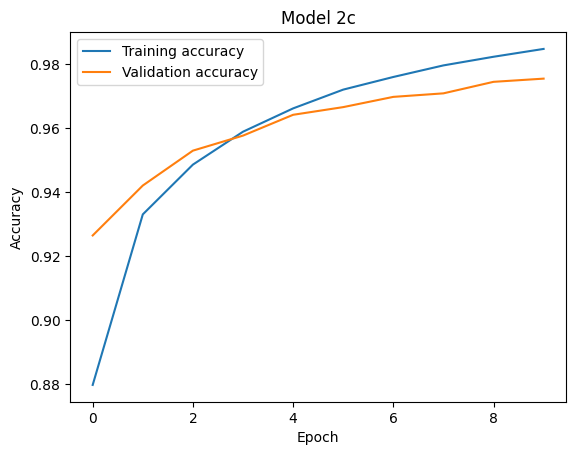

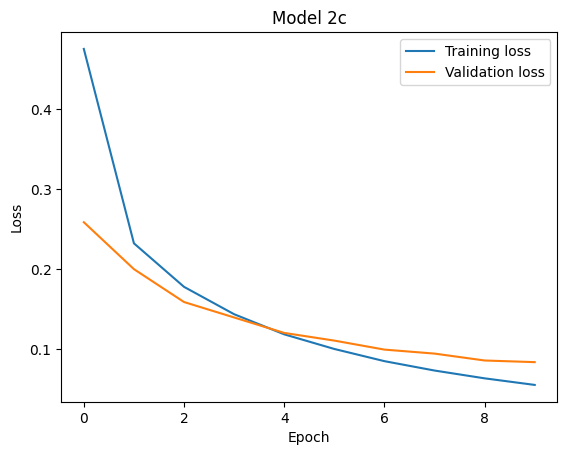

In [257]:
plot_history(history_2c, '2c')

The plot above of the first 10 epochs shows that the models may be starting to overfit, but it cannot be concluded yet, since the difference between accuracy and loss from training and validation are very small (less than 1%). To test if it will suffer from this problem, it can be trained for more epochs. However, even if it is going to overfit on future epochs, for this current epoch, it's a great model.

#### Model 2d

In [258]:
history_2d = model_2d.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8582 - loss: 0.5059 - val_accuracy: 0.9501 - val_loss: 0.1741
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9565 - loss: 0.1510 - val_accuracy: 0.9665 - val_loss: 0.1132
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9698 - loss: 0.1020 - val_accuracy: 0.9720 - val_loss: 0.0912
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9793 - loss: 0.0718 - val_accuracy: 0.9751 - val_loss: 0.0826
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9838 - loss: 0.0558 - val_accuracy: 0.9759 - val_loss: 0.0787
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9868 - loss: 0.0446 - val_accuracy: 0.9758 - val_loss: 0.0765
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9903 - loss: 0.0340 - val_accuracy: 0.9780 - val_loss: 0.0695
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9926 - loss: 0.0274 - val_accuracy: 0.

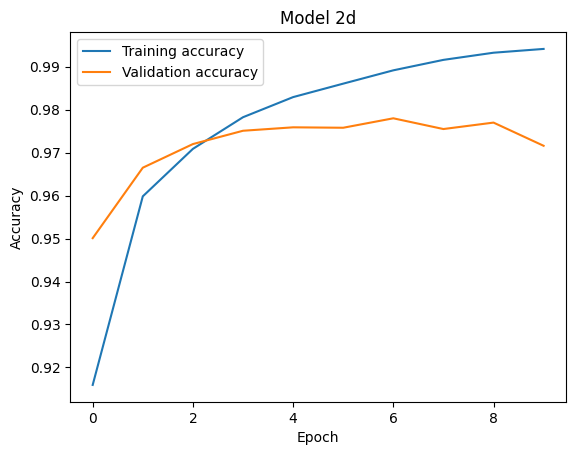

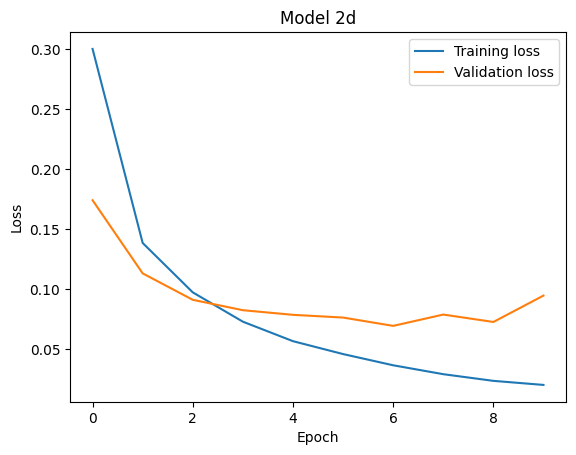

In [259]:
plot_history(history_2d, '2d')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, but the difference is too small to be considered overfitting. However, it's possible to conclude that the model from the epochs between 2 and 4 are probably better than the current one, since it's only getting better on identifying the patterns from training, and not from a general perspective.

#### Model 2e.1

In [260]:
history_2e_1 = model_2e_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8749 - loss: 0.4342 - val_accuracy: 0.9612 - val_loss: 0.1296
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9656 - loss: 0.1178 - val_accuracy: 0.9715 - val_loss: 0.0938
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9784 - loss: 0.0713 - val_accuracy: 0.9753 - val_loss: 0.0780
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9852 - loss: 0.0518 - val_accuracy: 0.9785 - val_loss: 0.0716
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9892 - loss: 0.0374 - val_accuracy: 0.9787 - val_loss: 0.0697
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9922 - loss: 0.0280 - val_accuracy: 0.9801 - val_loss: 0.0686
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9940 - loss: 0.0208 - val_accuracy: 0.9803 - val_loss: 0.0690
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9952 - loss: 0.0180 - val_accuracy: 0.

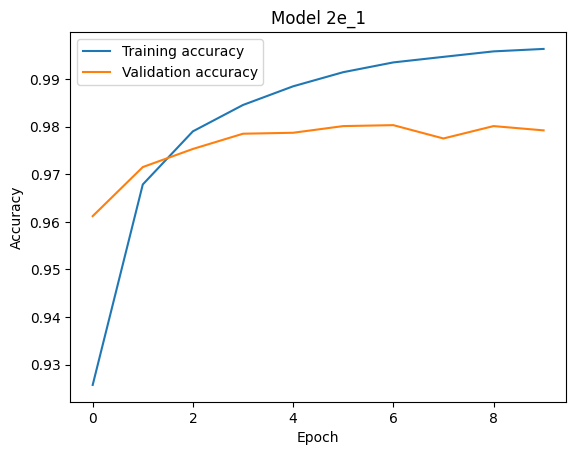

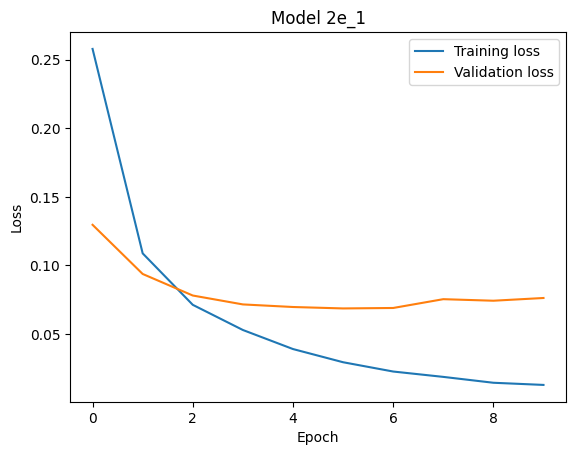

In [261]:
plot_history(history_2e_1, '2e_1')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, and the difference might suggests an overfitting. However, it's possible to conclude that the model from the epochs between 2 and 3 are probably better than the current one, since the current one is only getting better on identifying the patterns from training, and not from a general perspective (doesn't improve very much validation data).

#### Model 2e.2

In [262]:
history_2e_2 = model_2e_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8647 - loss: 0.4896 - val_accuracy: 0.9552 - val_loss: 0.1515
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9619 - loss: 0.1285 - val_accuracy: 0.9701 - val_loss: 0.0985
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9761 - loss: 0.0782 - val_accuracy: 0.9719 - val_loss: 0.0917
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9819 - loss: 0.0582 - val_accuracy: 0.9736 - val_loss: 0.0833
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9737 - val_loss: 0.0938
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9885 - loss: 0.0358 - val_accuracy: 0.9778 - val_loss: 0.0724
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9795 - val_loss: 0.0713
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.

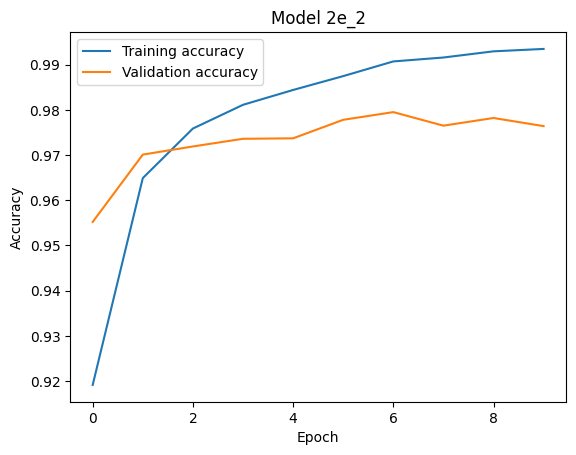

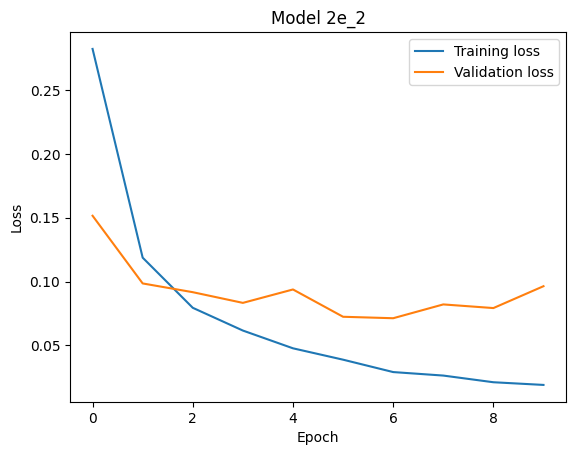

In [263]:
plot_history(history_2e_2, '2e_2')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, so it could be an overfitting. However, it's possible to conclude that the model from the fifth or sixth epoch is probably better than the current one, since the current on is only getting better on identifying the patterns from training, and not from a general perspective (best validation state in on fifth or sixth epoch, although since the second epoch, validation hasn't improved much).

## Visualization functions

In [264]:
def visualize_misclassified(model, x_data, y_data, num_samples=5):
    predictions = np.argmax(model.predict(x_data), axis=1)
    incorrect = np.where(predictions != y_data)[0]
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(incorrect[:num_samples]):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_data[idx], cmap='gray')
        plt.title(f"Pred: {predictions[idx]}, True: {y_data[idx]}")
        plt.axis('off')
    plt.show()

In [265]:
def confusion_matrix_generator(model):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot(cmap='Blues', xticks_rotation=45)
    plt.show()

## Results

model_2a


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step


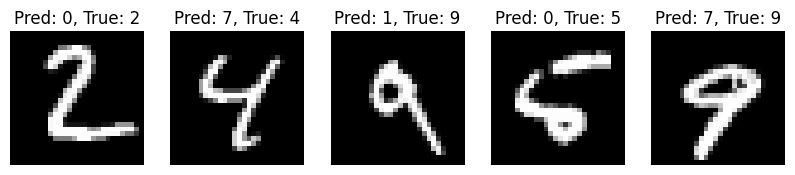

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


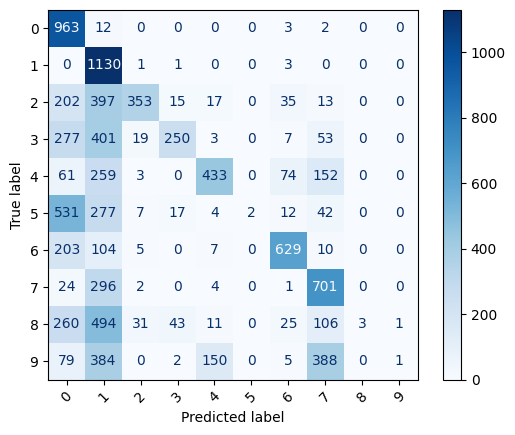

In [266]:
print("model_2a")
visualize_misclassified(model_2a, x_test, y_test)
confusion_matrix_generator(model_2a)

model_2b
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


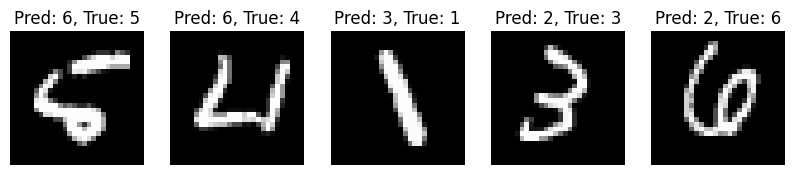

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


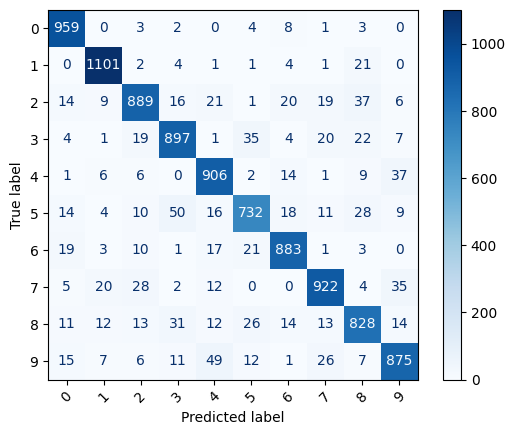

In [267]:
print("model_2b")
visualize_misclassified(model_2b, x_test, y_test)
confusion_matrix_generator(model_2b)

model_2c
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


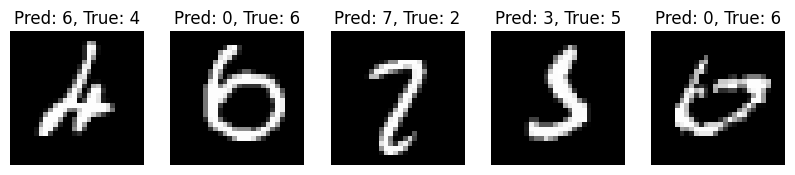

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


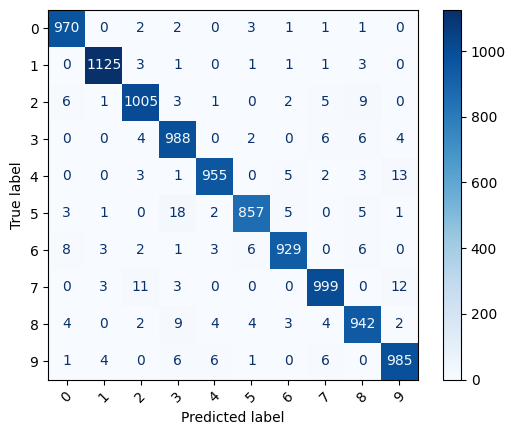

In [268]:
print("model_2c")
visualize_misclassified(model_2c, x_test, y_test)
confusion_matrix_generator(model_2c)

model_2d
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


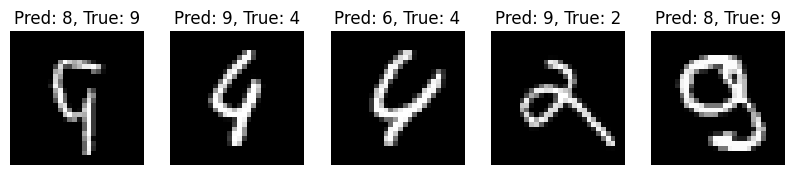

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


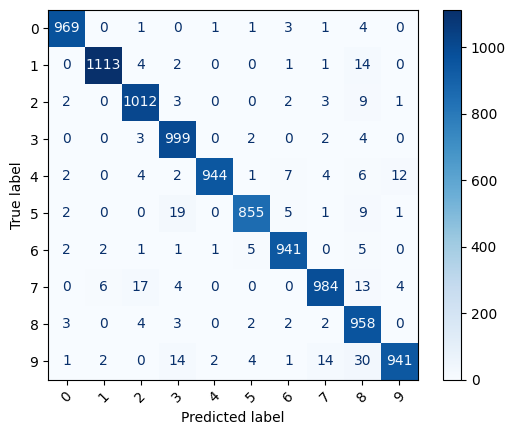

In [269]:
print("model_2d")
visualize_misclassified(model_2d, x_test, y_test)
confusion_matrix_generator(model_2d)

model_2e_1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


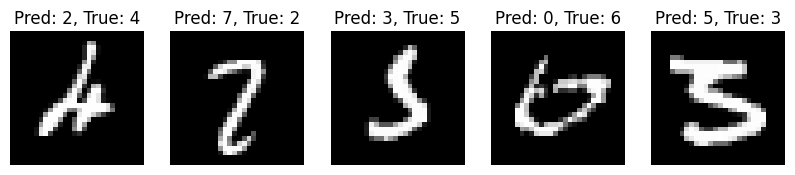

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


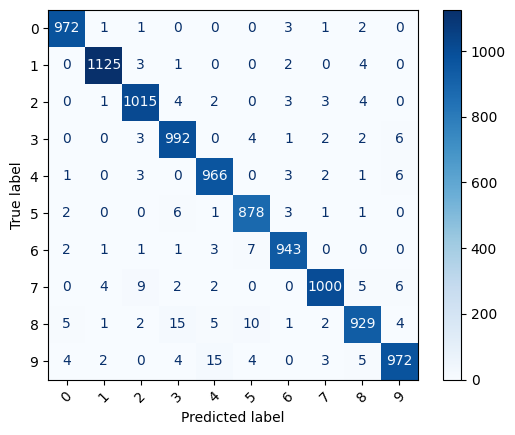

In [270]:
print("model_2e_1")
visualize_misclassified(model_2e_1, x_test, y_test)
confusion_matrix_generator(model_2e_1)

model_2e_2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


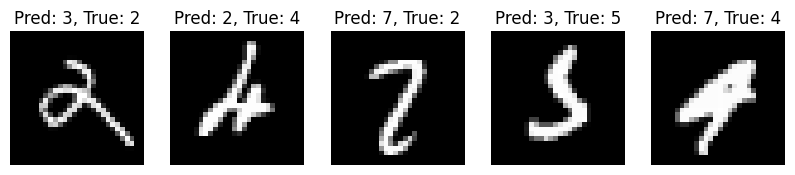

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


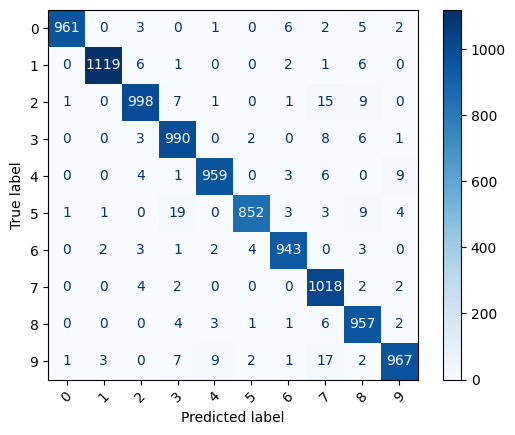

In [271]:
print("model_2e_2")
visualize_misclassified(model_2e_2, x_test, y_test)
confusion_matrix_generator(model_2e_2)